In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
# tf.random.set_seed(777)  # for reproducibility

from pso_tf import PSO
from tensorflow import keras

print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import matplotlib.pyplot as plt

def get_data():
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    return x, y

def make_model():
    leyer = []
    leyer.append(layers.Dense(2, activation='sigmoid', input_shape=(2,)))
    leyer.append(layers.Dense(1, activation='sigmoid'))

    model = Sequential(leyer)

    sgd = keras.optimizers.SGD(lr=0.1, momentum=1, decay=1e-05, nesterov=True)
    # adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.)
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

    print(model.summary())

    return model

2023-05-24 15:30:18.194977: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.10.0


In [2]:
'''
optimizer parameter
'''
lr = 0.1
momentun = 0.8
decay = 1e-04
nestrov = True

'''
pso parameter
'''
n_particles = 30
maxiter = 20
# epochs = 1
w = 0.75
c0 = 0.5
c1 = 1.5

x, y = get_data()
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_test = np.array([[0], [1], [1], [0]])

model = make_model()

loss = keras.losses.MeanSquaredError()
# optimizer = keras.optimizers.SGD(lr=0.1, momentum=0.9, decay=1e-05, nesterov=True)


pso_xor = PSO(model=model, loss_method=loss, n_particles=15)

best_weights, score = pso_xor.optimize(x, y, x_test, y_test, maxiter=maxiter, c0=c0, c1=c1, w=w)

model.set_weights(best_weights)

y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

history = pso_xor.global_history()



# print(f"history > {history}")
# print(f"score > {score}")
# plt.plot(history)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/home/pieroot/miniconda3/envs/pso/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None


Iter 0/20:  27%|##6       | 4/15 [00:00<00:01,  5.80it/s]

Iter 0/20:  33%|###3      | 5/15 [00:01<00:01,  6.72it/s]

Iter 0/20: 100%|##########| 15/15 [00:02<00:00,  7.16it/s]


loss avg : 0.01894655227661133 | acc avg : 0.03333333333333333 | best score : 0.5


Iter 1/20: 100%|##########| 15/15 [00:01<00:00,  9.30it/s]


loss avg : 0.016662003596623738 | acc avg : 0.016666666666666666 | best score : 0.5


Iter 2/20: 100%|##########| 15/15 [00:01<00:00,  8.80it/s]


loss avg : 0.02029351592063904 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 3/20: 100%|##########| 15/15 [00:01<00:00,  9.08it/s]


loss avg : 0.026707116762797037 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 4/20: 100%|##########| 15/15 [00:01<00:00,  8.70it/s]


loss avg : 0.029503581921259563 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 5/20: 100%|##########| 15/15 [00:01<00:00,  9.35it/s]


loss avg : 0.027975618839263916 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 6/20: 100%|##########| 15/15 [00:01<00:00,  9.34it/s]


loss avg : 0.023983001708984375 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 7/20: 100%|##########| 15/15 [00:01<00:00,  9.31it/s]


loss avg : 0.019697668155034383 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 8/20: 100%|##########| 15/15 [00:01<00:00,  8.59it/s]


loss avg : 0.01731112798055013 | acc avg : 0.016666666666666666 | best score : 0.75


Iter 9/20: 100%|##########| 15/15 [00:01<00:00,  9.13it/s]


loss avg : 0.01932766040166219 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 10/20: 100%|##########| 15/15 [00:01<00:00,  9.43it/s]


loss avg : 0.020982118447621663 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 11/20: 100%|##########| 15/15 [00:01<00:00,  9.40it/s]


loss avg : 0.023207948605219523 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 12/20: 100%|##########| 15/15 [00:01<00:00,  8.24it/s]


loss avg : 0.015533120433489481 | acc avg : 0.05 | best score : 0.75


Iter 13/20: 100%|##########| 15/15 [00:01<00:00,  9.24it/s]


loss avg : 0.02530163327852885 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 14/20: 100%|##########| 15/15 [00:01<00:00,  9.29it/s]


loss avg : 0.03278601765632629 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 15/20: 100%|##########| 15/15 [00:01<00:00,  9.12it/s]


loss avg : 0.033097052574157716 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 16/20: 100%|##########| 15/15 [00:01<00:00,  9.23it/s]


loss avg : 0.03319232066472371 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 17/20: 100%|##########| 15/15 [00:01<00:00,  8.21it/s]


loss avg : 0.029442755381266277 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 18/20: 100%|##########| 15/15 [00:01<00:00,  9.26it/s]


loss avg : 0.016768980026245116 | acc avg : 0.03333333333333333 | best score : 0.75


Iter 19/20: 100%|##########| 15/15 [00:01<00:00,  9.41it/s]

loss avg : 0.03326260050137838 | acc avg : 0.03333333333333333 | best score : 0.75
1/1 [==============================] - 0s 43ms/step
[[0.5687527 ]
 [0.52202636]
 [0.5148632 ]
 [0.48929393]]
[[0]
 [1]
 [1]
 [0]]


Text(0.5, 1.0, 'acc history')

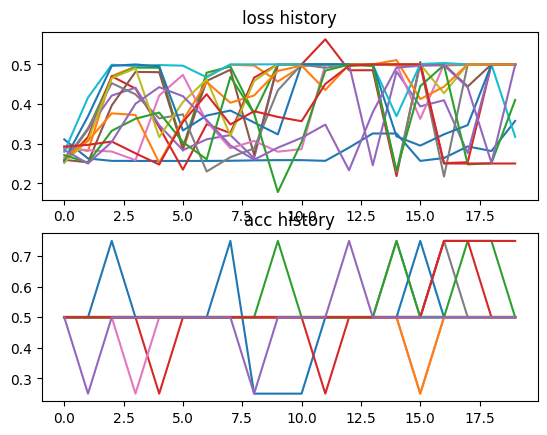

In [6]:
all_loss, all_acc = pso_xor.all_history()
# print(np.shape(all_))
# print(all_[0][0][1])
# loss_ = [[]*len(all_[0])]*len(all_)
# acc_ = [[]*len(all_[0])]*len(all_)
# for al_index in range(len(all_)):
    # for i in all_[al_index]:
        # loss_[al_index].append((i[0]))
        # acc_[al_index] = (i[1])
        # acc_.append(i[1])
    # print(particle)
    # loss_.append(particle[0])

# print(np.shape(all_loss))
plt.subplot(2,1,1)
for layer in all_loss:
    plt.plot(layer)
plt.title('loss history')

plt.subplot(2,1,2)
for layer in all_acc:
    plt.plot(layer)
plt.title('acc history')
# plt.plot(all_loss)

# plt.plot(all_acc)

    # plt.plot(all_[i])
    # for layer in all_[i]:
        # print(layer[0])
        # plt.plot(layer[1])
    # for j in range(len(all_[i])):
        
        # print(all_[i][j][0])
        # plt.plot(all_[i][j][1])
    # plt.plot(all_[i])
    # print(f"epoch {i} > {all_[i]}")
# print(np.shape(all_))


In [3]:
x_test = np.array([[0, 1], [0, 0], [1, 1], [1, 0]])
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

1/1 [==============================] - 0s 12ms/step
[[0.51426786]
 [0.49928975]
 [0.49840933]
 [0.48371843]]
[[0]
 [1]
 [1]
 [0]]


In [ ]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
not_correct = []
for i in range(len(y_test)):
    if predicted_labels[i] != y_test[i]:
        not_correct.append(i)
        # print(f"추론 > {predicted_labels[i]} | 정답 > {y_test[i]}")
        
print(f"틀린 것 갯수 > {len(not_correct)}")
for i in range(3):
    plt.imshow(x_test[not_correct[i]].reshape(28,28), cmap='Greys')
plt.show()

In [ ]:
all__ = pso_xor.all_cost()

def plot_history(history):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()
hist = test()
plot_history(hist)